### Multivariate regression  (using hiring dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
# import warnings

# plt.style.use('dark_background')
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Data Science\datasets\hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
import math
tScore_median = math.floor(df['test_score(out of 10)'].median())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(tScore_median)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [4]:
from word2number import w2n

df.experience = df.experience.fillna("zero")
df.experience = df.experience.apply(w2n.word_to_num)
        
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values, df[['salary($)']])

LinearRegression()

In [6]:
reg.predict([[2,9,6]])

array([[53205.96797671]])

In [7]:
reg.predict([[12,10,10]])

array([[92002.18340611]])

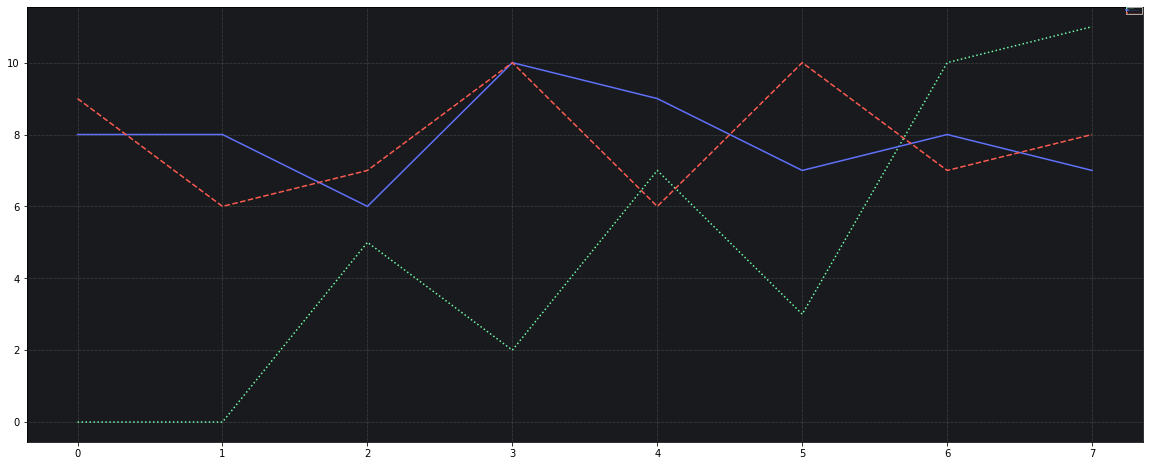

In [34]:
%matplotlib inline
plt.rcParams['axes.facecolor'] = '#191A1D'
plt.rcParams["figure.figsize"] = (20, 8)


plt.plot(df['experience'], ls=':', color='#71FCAA')
plt.plot(df['test_score(out of 10)'], ls='-', color='#6071FC')
plt.plot(df['interview_score(out of 10)'], ls='--', color='#FC5B52')
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.legend(['experience', 'test_score(out of 10)', 'interview_score(out of 10)'], labelcolor='linecolor', prop={'size':1})

# plt.scatter(df[['test_score(out of 10)']].values, df[["salary($)"]].values, color='#6071FC', marker='+')
# plt.scatter(df[['interview_score(out of 10)']].values, df[["salary($)"]].values, color='#FC5B52', marker='1')


# plt.plot(df[['salary($)']].values, reg.predict(df[["salary($)", "salary($)", "salary($)"]].values), color="#71FCAA")

In [30]:
reg.score(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values, df[["salary($)"]])

0.9616780002577959